In [2]:
## Dataframe의 row indexing
import numpy as np
import pandas as pd

data = {
    "이름": ["홍길동","최길동","김길동","고길동","이길동"],
    "학과": ["영어영문","정치외교","역사","수학","경영"],
    "학년":[1,2,3,4,2],
    "학점":[3.1,2.0,3.8,4.2,3.5]
}
df = pd.DataFrame(data,
                 columns = ["학과","학년","이름","학점","등급"],
                 index = ["one","two","three","four","five"])

df["등급"] = ["A","C","B","B","S"]
display(df)

,학과,학년,이름,학점,등급
one,영어영문,1,홍길동,3.1,A
two,정치외교,2,최길동,2.0,C
three,역사,3,김길동,3.8,B
four,수학,4,고길동,4.2,B
five,경영,2,이길동,3.5,S


In [3]:
df["이름"] # 이름컬럼만 가져오게 됨 # 하나의 컬럼만 가져올 때

one      홍길동
two      최길동
three    김길동
four     고길동
five     이길동
Name: 이름, dtype: object

In [4]:
# 학년-학점까지 가져오고 싶을 때
df[["학년","학점"]] # fancy indexing

,학년,학점
one,1,3.1
two,2,2.0
three,3,3.8
four,4,4.2
five,2,3.5


In [12]:
# df[2]   # column은 숫자 index로 들고 올 수 없음
# DataFrame에 대한 indexing에서 숫자를 이용하는 경우는 row indexing

df[1:3] # 슬라이싱 가능
df[1:2] # 2행만 가져오기 가능함! (1번째 인덱스)

,학과,학년,이름,학점,등급
two,정치외교,2,최길동,2.0,C


In [15]:
df[1:-1] # 0번째열,마지막꺼 제외하고 가져옴
# df[[0:3]]  # 숫자만 이용하는 fancy indexing은 안됨

,학과,학년,이름,학점,등급
two,정치외교,2,최길동,2.0,C
three,역사,3,김길동,3.8,B
four,수학,4,고길동,4.2,B


In [28]:
# df["one"]  # one이라는 이름의 column을 찾으라는 뜻이므로 가져오지않음!!
df["one":"three"] # row index name으로 slicing 가능
df["five":] # 일반적인 slicing기능 적용 가능!!
df[:]
# df["two":-1] # 섞어서 쓸 수 없음
# df[[one:]] # fancy indexing은 다 안됨

##DataFrame의 행과 열을 가져오기 위해 어떻게 해야하나
## 어떤 방식이 지원되고 어떤 방식이 지원되지 않는지를 구분


,학과,학년,이름,학점,등급
one,영어영문,1,홍길동,3.1,A
two,정치외교,2,최길동,2.0,C
three,역사,3,김길동,3.8,B
four,수학,4,고길동,4.2,B
five,경영,2,이길동,3.5,S


In [29]:
df.loc["two"]   # OK. loc & index를 이용하면 단일 row 추출가능

학과    정치외교
학년       2
이름     최길동
학점       2
등급       C
Name: two, dtype: object

In [34]:
# df.loc[1] # 숫자 인덱스는 불가능 # 단일 row추출 불가능
df.loc["four"] # 인덱스 값을 이용해 원하는 행을 가져옴
df.loc["one":"three"] # slicing도 가능.
df.loc[["one","five"]] # fancy indexing도 가능
# loc는 숫자 index가 쓰는 것이 아님.

,학과,학년,이름,학점,등급
one,영어영문,1,홍길동,3.1,A
five,경영,2,이길동,3.5,S


In [40]:
df.loc["one":"three",:] # 행과 열에대한 슬라이싱 가능
df.loc["one":"three","이름"] 

one      홍길동
two      최길동
three    김길동
Name: 이름, dtype: object

In [41]:
df.loc["one":"three",["이름","학점"]] # 열에 대한 fancy indexing. 원하는 df만 추출
# 다만 어쨋든!! 숫자 인덱스는 사용 불가능

,이름,학점
one,홍길동,3.1
two,최길동,2.0
three,김길동,3.8


## ROW를 추가하려면 어떻게 해야할까요?
* 특정 대상에 대해 4가지 작업을 할 수 있어요
* 추가/삭제/수정/검색 => CRUD작업
* create,read,update,delete 추가/추출/수정/삭제
* loc를 이용하면 편하게 추가할 수 있어요

In [43]:
df.loc["six"] = ["호텔경영",2,"김연아",4.5,np.nan]

In [44]:
df # 행이 하나 추가됨

,학과,학년,이름,학점,등급
one,영어영문,1,홍길동,3.1,A
two,정치외교,2,최길동,2.0,C
three,역사,3,김길동,3.8,B
four,수학,4,고길동,4.2,B
five,경영,2,이길동,3.5,S
six,호텔경영,2,김연아,4.5,NaN


In [53]:
df.loc["seven","이름":"등급"] = ["김김김","2.7","B"]
df

,학과,학년,이름,학점,등급
one,영어영문,1.0,홍길동,3.1,A
two,정치외교,2.0,최길동,2,C
three,역사,3.0,김길동,3.8,B
four,수학,4.0,고길동,4.2,B
five,경영,2.0,이길동,3.5,S
six,체육,2.0,김연아,4.5,NaN
seven,NaN,NaN,김김김,2.7,B


In [97]:
df.loc["seven",["학과","등급"]] = ["무용","F"]
df.loc["six","등급"] = ["S"]
df.loc["four","학점"] = [1.7]
df.drop("seven",axis=0,inplace=True)
df

,학과,학년,이름,학점,등급
one,영어영문,1.0,홍길동,3.1,A
two,정치외교,2.0,최길동,2,C
three,역사,3.0,김길동,3.8,B
four,수학,4.0,고길동,1.7,B
five,경영,2.0,이길동,3.5,S
six,체육,2.0,김연아,4.5,S


In [48]:
## 원래 존재하는 row에 대해서 assign작업을 하면 update작업이 수행
# df.loc["seven",["학과","등급"]] = ["무용","F"] -> df.loc["one",["학과","등급"]] = ["무용","F"] 하면
# 인덱스 "one"의 내용을 수정 및 업데이트 하게됨
df.loc["six","학과"] = ["체육"]
df

,학과,학년,이름,학점,등급
one,영어영문,1.0,홍길동,3.1,A
two,정치외교,2.0,최길동,2,C
three,역사,3.0,김길동,3.8,B
four,수학,4.0,고길동,4.2,B
five,경영,2.0,이길동,3.5,S
six,체육,2.0,김연아,4.5,NaN
seven,무용,NaN,김김김,2.7,F


In [51]:
## 삭제를 해 BoA요
## drop() 활용
df1 = df.drop("학점",axis=1) # column지우라는 뜻 / inplace를 생략하면 원본을 유지
df1

,학과,학년,이름,등급
one,영어영문,1.0,홍길동,A
two,정치외교,2.0,최길동,C
three,역사,3.0,김길동,B
four,수학,4.0,고길동,B
five,경영,2.0,이길동,S
six,체육,2.0,김연아,NaN
seven,무용,NaN,김김김,F


In [52]:
df.drop("seven",axis=0,inplace=True) # inplace를 true로 설정해서 원본변경
df

,학과,학년,이름,학점,등급
one,영어영문,1.0,홍길동,3.1,A
two,정치외교,2.0,최길동,2,C
three,역사,3.0,김길동,3.8,B
four,수학,4.0,고길동,4.2,B
five,경영,2.0,이길동,3.5,S
six,체육,2.0,김연아,4.5,NaN


In [63]:
# slicing을 통해 drop하는 것은 지원하지 않음
# df.drop("one":"three",axis=0)
df1 = df.drop(["one","three"],axis=0) # fancy indexing을 지원함
df

,학과,학년,이름,학점,등급
one,영어영문,1.0,홍길동,3.1,A
two,정치외교,2.0,최길동,2,C
three,역사,3.0,김길동,3.8,B
four,수학,4.0,고길동,4.2,B
five,경영,2.0,이길동,3.5,S
six,체육,2.0,김연아,4.5,NaN
seven,NaN,NaN,김김김,2.7,B


In [64]:
## df[],df.loc[]
## 숫자 인덱스를 이용해서 행과 열을 선택할 수 있는 iloc
df.iloc[0]     # 첫번째 row가 튀어나옴
# 특정row를 숫자 index로 추출할 수 있음.
df.iloc[0:3]
df.iloc[[0,3]]
df.iloc[[0,3],0]
# 0,0들고오려면? # 영어영문
df.iloc[0,0]

'영어영문'

### row & column에 대해서 indexing, slicing, fancy indexing에 대해서 알아보았습니da.

In [70]:
## boolean indexing은 mask를 사용해요
## boolean indexing
# 브로드캐스팅되면서 요소들이 true/false로 출력.numpy array
## 학점이 3.0 이상인 사람의 학과와 이름을 출력하세요
df

,학과,학년,이름,학점,등급
one,영어영문,1.0,홍길동,3.1,A
two,정치외교,2.0,최길동,2,C
three,역사,3.0,김길동,3.8,B
four,수학,4.0,고길동,4.2,B
five,경영,2.0,이길동,3.5,S
six,체육,2.0,김연아,4.5,NaN
seven,NaN,NaN,김김김,2.7,B


In [78]:
df["학점"] >= 3.1

one       True
two      False
three     True
four      True
five      True
six       True
Name: 학점, dtype: bool

In [79]:
df.loc[df["학점"] >= 3.0,["학과","이름"]]

,학과,이름
one,영어영문,홍길동
three,역사,김길동
four,수학,고길동
five,경영,이길동
six,체육,김연아


### 1. 이름이 최길동인 사람을 찾아 이름과 학점을 DataFrame으로 출력


In [81]:
df.loc[df["이름"]=="최길동",["이름","학점"]]

,이름,학점
two,최길동,2


### 2. 학점이 (1.5, 3.0)인 사람을 찾아 학과, 이름, 학점을 df로 출력

In [116]:
df.loc[(df["학점"] > 1.5) & (df["학점"] < 3.0),["학과","이름","학점"]]

,학과,이름,학점
two,정치외교,최길동,2
four,수학,고길동,1.7


In [118]:
df["학점"] > 1.5
df["학점"] < 3.0

one      False
two       True
three    False
four      True
five     False
six      False
Name: 학점, dtype: bool

In [94]:
df

,학과,학년,이름,학점,등급
one,영어영문,1.0,홍길동,3.1,A
two,정치외교,2.0,최길동,2,C
three,역사,3.0,김길동,3.8,B
four,수학,4.0,고길동,1.7,B
five,경영,2.0,이길동,3.5,S
six,체육,2.0,김연아,4.5,S


### 3. 학점이 3.0을 초과하는 사람을 찾아 등급을 A로 설정하세요

In [103]:
df.loc[df["학점"]>3.0, "등급"] = ["A"]
df

,학과,학년,이름,학점,등급
one,영어영문,1.0,홍길동,3.1,A
two,정치외교,2.0,최길동,2,C
three,역사,3.0,김길동,3.8,A
four,수학,4.0,고길동,1.7,B
five,경영,2.0,이길동,3.5,A
six,체육,2.0,김연아,4.5,A


In [26]:
## DataFrame을 제어해 보아요!!
## random seed 잡아서 재현성 확보
## [0,10] 정수형 난수를 균등분포로 (6,4)로 생성
import numpy as np
import pandas as pd

np.random.seed(10)
data = np.random.randint(0,10,(6,4))
df = pd.DataFrame(data)
display(df)

,0,1,2,3
0,9,4,0,1
1,9,0,1,8
2,9,0,8,6
3,4,3,0,4
4,6,8,1,8
5,4,1,3,6


In [27]:
## column과 index를 다시 정의해 보아요!
df.columns = ["A","B","C","D"]
df.index = pd.date_range("20190101",periods=6) # 끝나는 날을 직접 세지않고 일수만 periods로 추가

## NaN값(결측값)을 포함하는 새로운 컬럼 E를 추가해 보아요
df["E"] = [7,np.nan,np.nan,2,5,np.nan]
# np.nan은 결측값이지만 float로 간주가 됨. (실수) 

display(df)

,A,B,C,D,E
2019-01-01,9,4,0,1,7.0
2019-01-02,9,0,1,8,NaN
2019-01-03,9,0,8,6,NaN
2019-01-04,4,3,0,4,2.0
2019-01-05,6,8,1,8,5.0
2019-01-06,4,1,3,6,NaN


In [14]:
## sample로 결측값이 포함된 dataframe을 생성했어요
# 결측값을 포함한 행을 지우고 싶어요
new_df = df.dropna(how="any",inplace = False)
new_df = df.fillna(value=0, inplace = False)

In [28]:
new_df
df

,A,B,C,D,E
2019-01-01,9,4,0,1,7.0
2019-01-02,9,0,1,8,NaN
2019-01-03,9,0,8,6,NaN
2019-01-04,4,3,0,4,2.0
2019-01-05,6,8,1,8,5.0
2019-01-06,4,1,3,6,NaN


In [30]:
# E column에 NaN이 포함된 행을 찾아서
# B 와 C 컬럼의 값을 출력해보아요
# NaN을 판별하는 함수, isnull()을 이용해서 처리해 보아요.


df.loc[df.isnull()["E"],["B","C"]]

,B,C
2019-01-02,0,1
2019-01-03,0,8
2019-01-06,1,3


## 분석용 함수(기본통계함수)
##### 평균, 편차, 분산, 표준편차, 공분산, 상관계수

* 평균(mean)
* 편차(deviation): 확률변수X와 mean의 차이
##### ex) 8 5 7 3 2
###### mean: 5 deviation: 3 0 2 -2 -3 (편차의 합은 0)

* 분산(variation): 데이터의 흩어짐 정도를 알기 위해서 사용하는 값으로 편차의 제곱의 평균

* 표준편차(std):분산의 제곱근, 분산의 단위문제를 해결하고자 사용

* 공분산(Cov): 두 개의 확률변수 X,Y가 있을 때 이 두 개의 확률변수의 관계를 보여줄 때 사용 / 두 확률변수의 편차의 곱의 평균으로 표현, 데이터가 평균으로부터 얼마나 떨어져 있느냐를 표현

* 상관계수(Cor): 

In [34]:
arr = np.array([4,6,1,2,3,5,8],dtype = np.int32)
print(arr)
print(arr.mean()) #평균
print(arr.sum()) # 합
print(arr.var()) # 분산
print(arr.std()) # 표준편차

[4 6 1 2 3 5 8]
4.142857142857143
29
4.979591836734694
2.2314999074019015


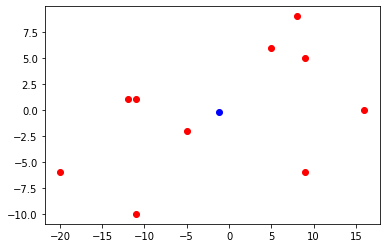

In [41]:
# import matplotlib.pyplot as plt
np.random.seed(10)
x = np.random.randint(-20,20,(10,))
y = np.random.randint(-10,10,(10,))
x_mean = x.mean()
y_mean = y.mean()

# 산점도 표현
plt.scatter(x,y,color="red")
plt.scatter(x_mean,y_mean,color="blue")
plt.show()

In [49]:
x_dev = x - x.mean()
y_dev = y - y.mean()
result = 0
for i in range(10):
    result += (x_dev[i] * y_dev[i])

myCov = result/10 # 모공분산: 원래공식
    # 표준공분산: (n-1)로 나눔, 추정치가 좋아짐

print(myCov)
print(np.cov(x,y))

30.76
[[144.84444444  34.17777778]
 [ 34.17777778  35.51111111]]


In [51]:
## 공분산이 양수인 경우(KOSPI 지수와 삼성전자 주가)
import pandas_datareader.data as pdr
from datetime import datetime

In [53]:
# 특정 날짜를 이용해서 금융데이터를 가져올꺼에요
start = datetime(2018,1,1) # 시작날짜
end = datetime(2018,12,31) # 끝날짜 지정
df_KOSPI = pdr.DataReader("^KS11","yahoo",start,end) # ^KS11 코스피(KOSPI) 지수
df_KOSPI.to_json("./data/KOSPI.json")
display(df_KOSPI)

SSLError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/%5EKS11/history?period1=1514746800&period2=1546282799&interval=1d&frequency=1d&filter=history (Caused by SSLError(SSLError(1, '[SSL: UNKNOWN_PROTOCOL] unknown protocol (_ssl.c:852)'),))

In [60]:
# 제공된 json파일을 이용해서 df로
# json을 불러와서 df만들어욤 2개
# Kospi.json, se.json
# np.cov()이용해서 공분산을 구해보아용
import json
file_KOSPI = open("./data/주식데이터/KOSPI.json","r")
file_SE = open("./data/주식데이터/SE.json","r")
KOSPI = pd.DataFrame(json.load(file_KOSPI))
SE = pd.DataFrame(json.load(file_SE))

closeK = KOSPI["Close"]
closeS = SE["Close"]

print(np.cov(closeK,closeS))
## 똑같은 작업을

[[   24177.23140621   490222.10530186]
 [  490222.10530186 11919911.50745463]]


In [61]:
file_KOSPI = open("./data/주식데이터/부산산업.json","r")
file_SE = open("./data/주식데이터/LIG넥스원.json","r")
BUSAN = pd.DataFrame(json.load(file_KOSPI))
LIG = pd.DataFrame(json.load(file_SE))

closeB = BUSAN["Close"]
closeL = LIG["Close"]

print(np.cov(closeB,closeL))

[[ 4.64762211e+09 -3.86535936e+08]
 [-3.86535936e+08  6.35924170e+07]]
